# House Price Prediction using Different Regression Models

### Import Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Importing Data

In [45]:
#load the dataset
df = pd.read_csv('USA_Housing.csv')
# Check for missing values
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### Exploratory Data Analysis (EDA)

In [47]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [48]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


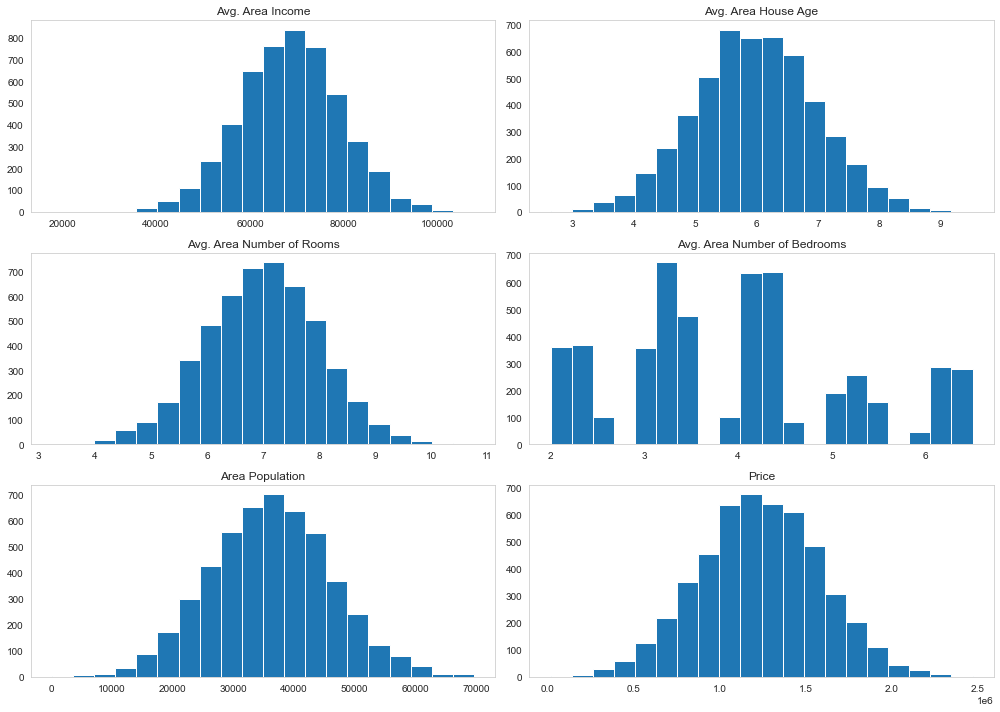

In [49]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot histograms for numerical features
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.tight_layout()
plt.show()

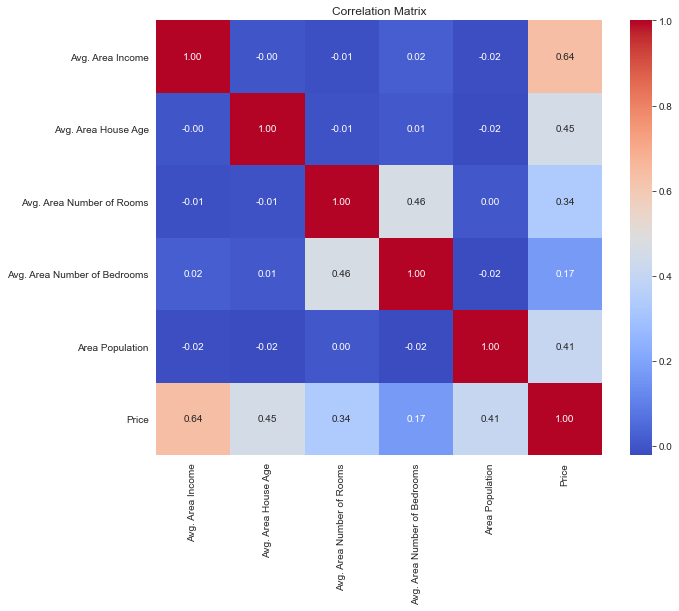

In [50]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

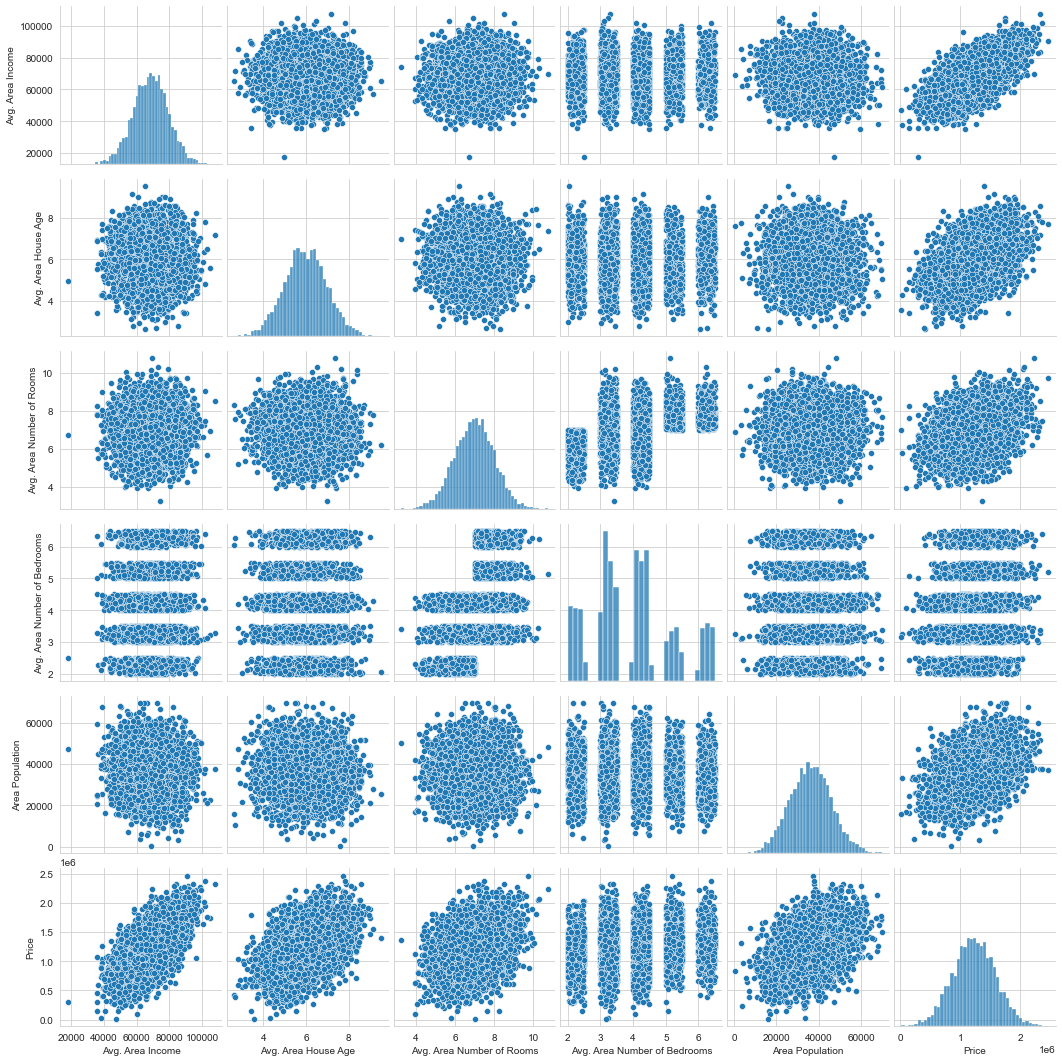

In [51]:
# Create pair plots
sns.pairplot(df)
plt.show()

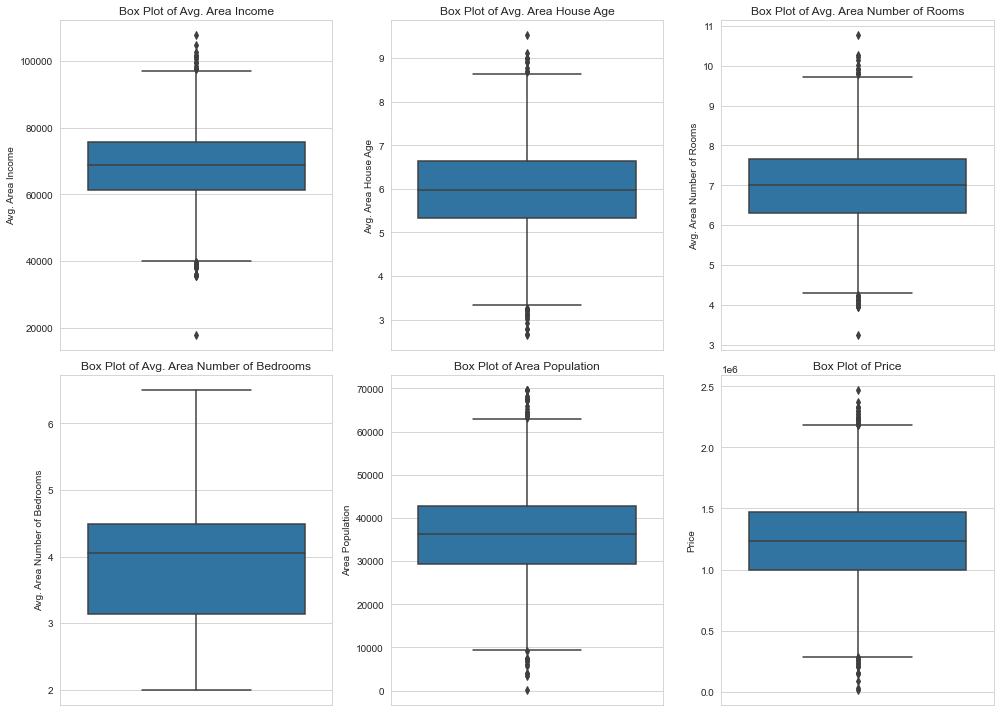

In [52]:
# Create box plots to identify outliers in numerical features
plt.figure(figsize=(14, 10))

# Subplot for each numerical feature
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()

#### Feature Selection
##### Important Features:
- Avg. Area Income: This feature shows a significant variation in income levels, which could be a crucial factor in predicting house prices.
- Avg. Area House Age: The age of the house might influence its value, making this feature important for prediction.
- Avg. Area Number of Rooms: The number of rooms can directly impact the price of a house, making it a relevant feature.
- Area Population: Population density in an area can affect housing demand and prices, making this feature valuable.
##### Feature to Consider Removing:
- Avg. Area Number of Bedrooms: While bedrooms are important, this feature might not add significant value beyond what the number of rooms already captures. Considering the high correlation between the number of rooms and bedrooms, removing this feature could simplify the model without losing much predictive power.

### Data Preprocessing

In [53]:
# Feature Selection
# Drop the 'Address' column and the 'Avg Area Number of Bedrooms' columns
df = df.drop(['Address', 'Avg. Area Number of Bedrooms'], axis=1)

# Split the data into features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model building and evaluating

#### Linear Regression

In [58]:
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [65]:
coeff_df = pd.DataFrame(lr_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232770.042411
Avg. Area House Age,163871.614125
Avg. Area Number of Rooms,122459.166350
Area Population,151222.838786


In [60]:
# Make predictions on the test data
predictions = lr_model.predict(X_test_scaled)

# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test, predictions)
lr_mse = mean_squared_error(y_test, predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {lr_mae}')
print(f'Mean Squared Error (MSE): {lr_mse}')
print(f'Root Mean Squared Error (RMSE): {lr_rmse}')
print(f'R-squared (R2): {lr_r2}')

Mean Absolute Error (MAE): 81116.43361053806
Mean Squared Error (MSE): 10062092569.298998
Root Mean Squared Error (RMSE): 100309.98240105019
R-squared (R2): 0.9147354890984772


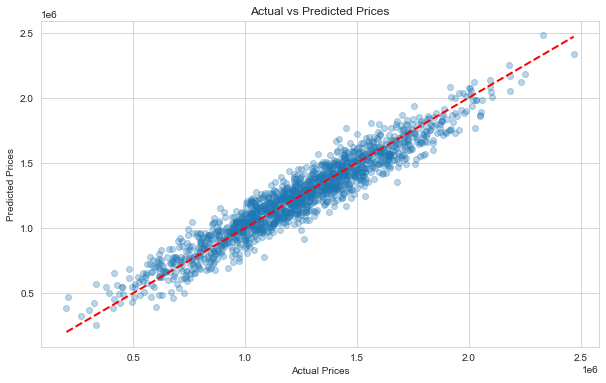

In [61]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


##### Ridge regression

In [63]:
# Create and train the ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [64]:
coeff_df = pd.DataFrame(ridge_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232702.742886
Avg. Area House Age,163824.843652
Avg. Area Number of Rooms,122423.411102
Area Population,151178.151258


In [66]:
# Make predictions on the test data
ridge_predictions = ridge_model.predict(X_test_scaled)

# Calculate evaluation metrics
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f'Mean Absolute Error (MAE): {ridge_mae}')
print(f'Mean Squared Error (MSE): {ridge_mse}')
print(f'Root Mean Squared Error (RMSE): {ridge_rmse}')
print(f'R-squared (R2): {ridge_r2}')


Mean Absolute Error (MAE): 81116.81430285246
Mean Squared Error (MSE): 10061929583.529095
Root Mean Squared Error (RMSE): 100309.16998724043
R-squared (R2): 0.9147368702129779


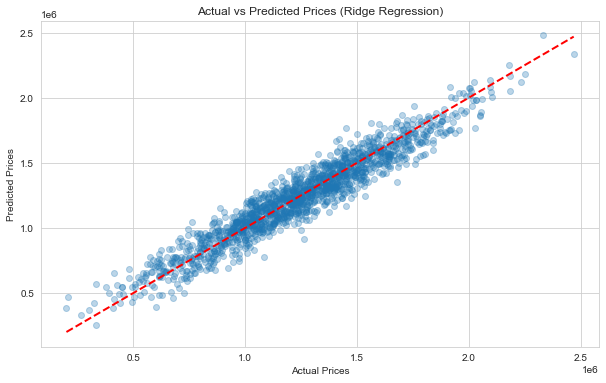

In [67]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Ridge Regression)')
plt.show()


##### Random Forest Regressor

In [68]:
# Create and train the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'Root Mean Squared Error (RMSE): {rf_rmse}')
print(f'R-squared (R2): {rf_r2}')

Mean Absolute Error (MAE): 93587.25148296726
Mean Squared Error (MSE): 13962367090.74978
Root Mean Squared Error (RMSE): 118162.46058181838
R-squared (R2): 0.8816852068472636


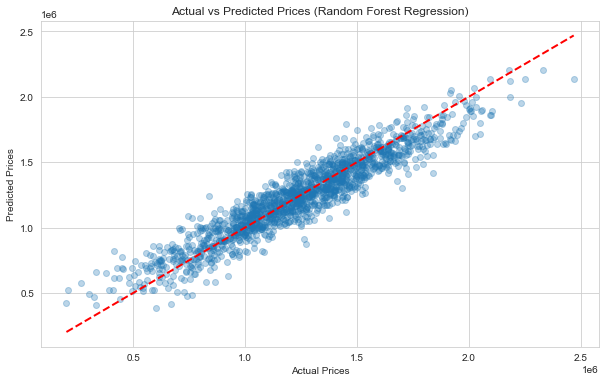

In [72]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Random Forest Regression)')
plt.show()

### Comparing Models

In [74]:
# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest Regression'],
    'MAE': [lr_mae, ridge_mae, rf_mae],
    'MSE': [lr_mse, ridge_mse, rf_mse],
    'RMSE': [lr_rmse, ridge_rmse, rf_rmse],
    'R2': [lr_r2, ridge_r2, rf_r2]
})

metrics_df

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,81116.433611,1.006209e+10,100309.982401,0.914735
1,Ridge Regression,81116.814303,1.006193e+10,100309.169987,0.914737
2,Random Forest Regression,93587.251483,1.396237e+10,118162.460582,0.881685


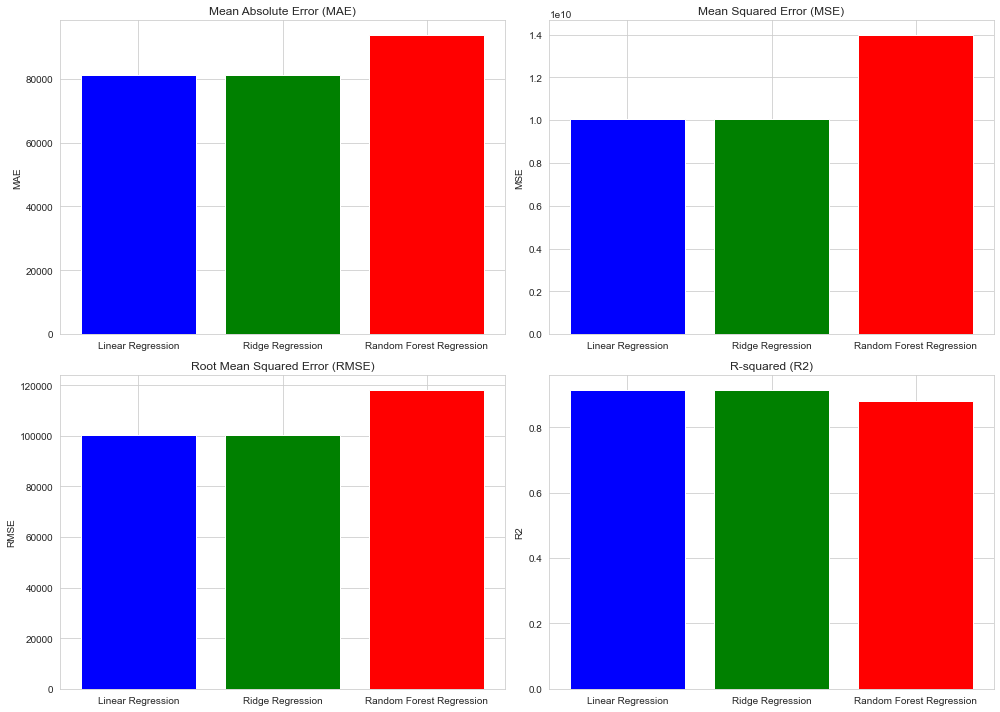

In [75]:
# Plot the comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MAE
axes[0, 0].bar(metrics_df['Model'], metrics_df['MAE'], color=['blue', 'green', 'red'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE
axes[0, 1].bar(metrics_df['Model'], metrics_df['MSE'], color=['blue', 'green', 'red'])
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE
axes[1, 0].bar(metrics_df['Model'], metrics_df['RMSE'], color=['blue', 'green', 'red'])
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R2
axes[1, 1].bar(metrics_df['Model'], metrics_df['R2'], color=['blue', 'green', 'red'])
axes[1, 1].set_title('R-squared (R2)')
axes[1, 1].set_ylabel('R2')

# Adjust layout
plt.tight_layout()
plt.show()

Based on the model evaluation metrics:

- Both Linear Regression and Ridge Regression models have almost identical performance in terms of Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) values. This indicates that regularization using Ridge Regression did not significantly impact the model's performance compared to the standard Linear Regression.

- The Random Forest Regression model shows slightly higher values for MAE, MSE, and RMSE compared to the Linear and Ridge Regression models. However, the R-squared (R2) value is slightly lower for the Random Forest Regressor model. This suggests that while the Random Forest model may have a higher prediction error, it captures less of the variance in the target variable compared to the linear models.

In conclusion, both Linear Regression and Ridge Regression models perform similarly and outperform the Random Forest Regressor model in terms of prediction accuracy and capturing variance in the target variable. However, the Random Forest model may still offer advantages in capturing complex non-linear relationships in the data, albeit with slightly lower predictive accuracy.